# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 3.5 MB 31.5 MB/s 
     |████████████████████████████████| 1.2 MB 28.0 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 36.8 MB/s 
     |████████████████████████████████| 596 kB 40.9 MB/s 
     |████████████████████████████████| 895 kB 40.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=8125dcd6216a0953c261d4c95159e891178d0de5fdab0926ece338daf1313d0d
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [6]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [7]:
X = list()
y = list(newsgroups_train.target)
for article in list(newsgroups_train.data):
  X.append(get_review_embedding(article))


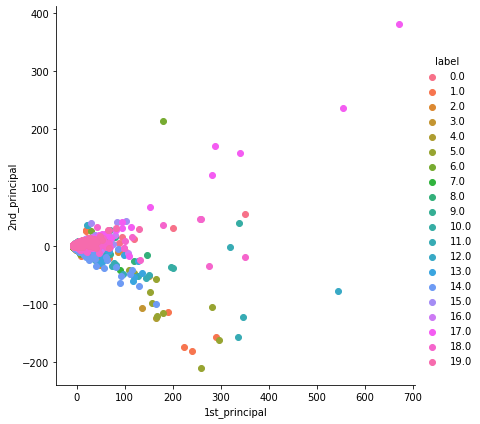

In [8]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 
import numpy
import seaborn as sn
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X = numpy.array(X)
y = numpy.array(y)
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
# print(standardized_data.shape)
sample_data = standardized_data
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data = np.vstack((pca_data.T, y)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# K_Means Algorithm


In [9]:
from transformers.utils.dummy_pt_objects import ConvBertForMaskedLM
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans
def KMeansClustering(n_cls):
  kmeans = KMeans(n_clusters=n_cls, random_state=4).fit(X)
  return kmeans




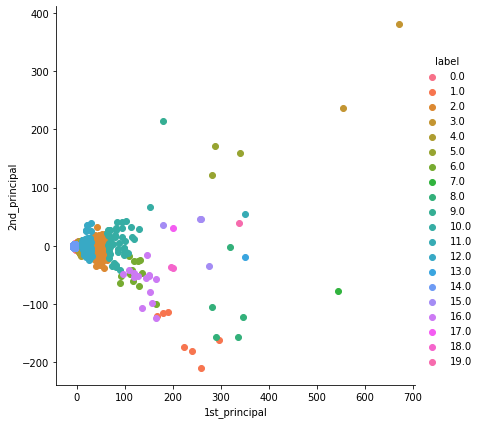

In [10]:
#code for visualisation of clusters

pca = PCA()
X = numpy.array(X)

y = numpy.array(KMeansClustering(20).labels_)
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data = np.vstack((pca_data.T, y)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()




# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







We can see from the below graph that average distortion sharply fall down at point k ~ 3 (approx), so this is our optimal number of clusters.

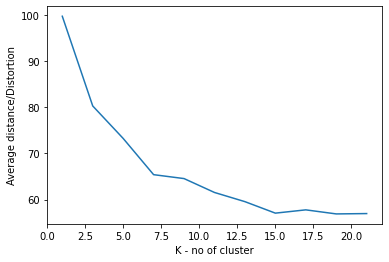

In [18]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics

def elbow_method():
  avg_distance = []
  number_of_cluster = [int(i) for i in range(1,22,2)]
  for nc in number_of_cluster:
    k_means=KMeansClustering(nc)
    k_means.fit(X)
    avg_distance.append(sum(np.min(cdist(X, k_means.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
   
  x = number_of_cluster
  y = avg_distance
  plt.plot(x, y)
  plt.xlabel('K - no of cluster')
  plt.ylabel('Average distance/Distortion')
  plt.show()  
  

elbow_method()
  


# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




We can see from the below graph that silhoutte score is sharply fall down at point approx 2 or 3, so this is our optimal number of clusters.  
The optimal number of clusters obtained from elbow is 3 and from silhouette is 3, so this can be the optimal value of clusters.

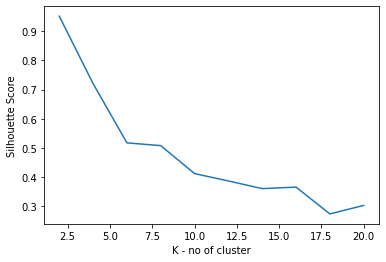

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def find_score(nc):
  kmeans= KMeans(n_clusters=nc)
  kmeans.fit(X,y)
  labels = kmeans.labels_
  return metrics.silhouette_score(X, labels, metric = 'euclidean')

def silhouette_score():
  s_score = []
  number_of_cluster = [int(i) for i in range(2,22,2)]
  for nc in number_of_cluster:
    s_score.append(find_score(nc))
   
  x = number_of_cluster
  y = s_score
  plt.plot(x, y)
  plt.xlabel('K - no of cluster')
  plt.ylabel('Silhouette Score')
  plt.show()  
  

silhouette_score()  



# Agglomerative clustering

In [26]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClustering_(n_cls):
  clustering = AgglomerativeClustering(n_clusters = n_cls).fit(X)
  return clustering




    

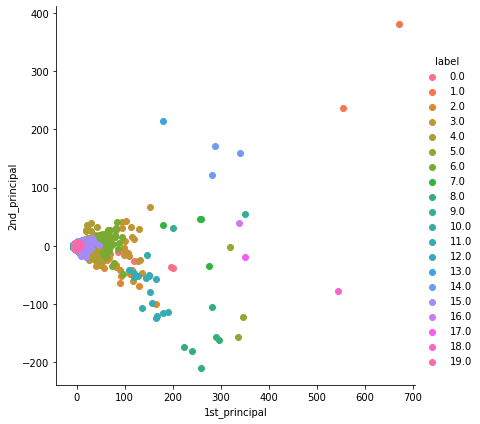

In [27]:
#code for visualisation of clusters
agglo_clustering = AgglomerativeClustering_(20)
pca = PCA()
y = numpy.array(agglo_clustering.labels_)

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data = np.vstack((pca_data.T, y)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()



# Dendogram


*   Try to understand the difference between agglomerative clustering and Divisive clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



Hierarchical clustering is a method of cluster analysis that is used to cluster similar data points together. Hierarchical clustering follows either the top-down/Divisive clustering or bottom-up/Agglomerative clustering method of clustering.  
Initially in Divisive hierarchical clustering, all the points in the dataset belong to one cluster and split is performed recursively as one moves down the hierarchy.  
Initially in Agglomerative hierarchical clustering, each data point is a cluster of its own, further pairs of clusters are merged as one moves up the hierarchy.

To figure out the optimal number of clusters with the help of dendogram diagram:-
Firstly determine the largest vertical distance that doesn’t intersect any of the other clusters. Secondly draw a horizontal line at both extremities and 
The optimal number of clusters is equal to the number of vertical lines going through this horizontal line.  
But in our case, we can see from our dendogram that the optimal number of clusters is 2 or 3 because there is largest vertical distance between 1000 and 2000 or so.

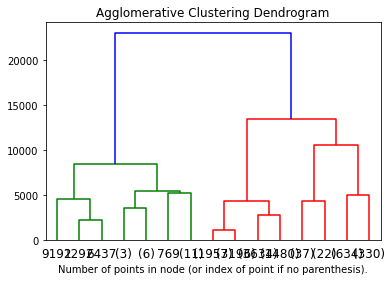

In [29]:
# code to write dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title("Agglomerative Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


